# Football Player Exploratory Data Analysis (EDA)

## Overview

This project is an Exploratory Data Analysis of Football players profile in the top 5 leagues (English Premier League, La Liga, Bundesliga, Serie A, and Ligue 1) 2022/23 season. In this dataset there is some information such as player name, age, price and much more. You can get the dataset on the following [link](https://www.kaggle.com/datasets/oles04/top-leagues-player)

In [412]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [413]:
df = pd.read_csv('top5_leagues_player.csv')
df

,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,league
0,0,Ederson,NaN,29,1.88,Brazil Portugal,Osasco (SP),45.00,70.00,Goalkeeper,31,left,Man City,2026-06-30,2017-07-01,Gestifute,Puma,EPL
1,1,Stefan Ortega,Stefan Ortega Moreno,30,1.85,Germany Spain,Hofgeismar,6.00,6.00,Goalkeeper,18,right,Man City,2025-06-30,2022-07-01,neblung ...,NaN,EPL
2,2,Scott Carson,Scott Paul Carson,37,1.88,England,Whitehaven,0.25,6.00,Goalkeeper,33,right,Man City,2023-06-30,2021-07-20,Wasserman,Puma,EPL
3,3,Rúben Dias,Rúben Santos Gato Alves Dias,26,1.87,Portugal,Amadora,75.00,75.00,Defender - Centre-Back,3,right,Man City,2027-06-30,2020-09-29,Gestifute,Nike,EPL
4,4,Nathan Aké,Nathan Benjamin Aké,28,1.80,Netherlands Cote d'Ivoire,Den Haag,35.00,40.00,Defender - Centre-Back,6,left,Man City,2025-06-30,2020-08-05,Wasserman,Nike,EPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,2607,Moussa Djitté,Moussa Kalilou Djitté,23,1.80,Senegal,Diattouma,2.00,2.00,Attack - Centre-Forward,28,right,AC Ajaccio,2023-06-30,2023-01-31,FS Management,NaN,Other
2608,2608,Mounaïm El Idrissy,منعم الإدريسي,24,1.81,France Morocco,Martigues,1.80,1.80,Attack - Centre-Forward,7,right,AC Ajaccio,2023-06-30,2019-07-01,N.Agency,NaN,Other
2609,2609,Moussa Soumano,NaN,17,NaN,France Mali,NaN,0.90,0.90,Attack - Centre-Forward,34,NaN,AC Ajaccio,2026-06-30,2023-01-01,NaN,NaN,Other
2610,2610,Romain Hamouma,NaN,36,1.79,France Algeria,Montbéliard,0.60,7.00,Attack - Centre-Forward,17,right,AC Ajaccio,2023-06-30,2022-07-01,Gallea Gestion S.A,NaN,Other


## Data Cleansing

### Removing unnecessary column

In [415]:
df.drop(columns=['Unnamed: 0', 'full_name', 'contract_expires', 'joined_club', 'player_agent', 'place_of_birth'], axis=1, inplace=True)

### Adding new column / Splitting 'position' column into different column

In [416]:
role_series = df['position'].apply(lambda x: x.split('-', 1)[0].strip())
role_series.replace({'Goalkeeper':str('Defender'),
                    'Defender':str('Defender'),
                    'midfield':str('Midfielder')}, inplace=True)
df.insert(7,'role',role_series)
df['position'] = df['position'].apply(lambda x: x.split('-',1)[-1].strip())

### Removing players from 'other' league

In [417]:
df = df[df.league != 'Other']

## Exploratory Data Analysis

In [418]:
df

,name,age,height,nationality,price,max_price,position,role,shirt_nr,foot,club,outfitter,league
0,Ederson,29,1.88,Brazil Portugal,45.00,70.0,Goalkeeper,Defender,31,left,Man City,Puma,EPL
1,Stefan Ortega,30,1.85,Germany Spain,6.00,6.0,Goalkeeper,Defender,18,right,Man City,NaN,EPL
2,Scott Carson,37,1.88,England,0.25,6.0,Goalkeeper,Defender,33,right,Man City,Puma,EPL
3,Rúben Dias,26,1.87,Portugal,75.00,75.0,Defender - Centre-Back,Defender,3,right,Man City,Nike,EPL
4,Nathan Aké,28,1.80,Netherlands Cote d'Ivoire,35.00,40.0,Defender - Centre-Back,Defender,6,left,Man City,Nike,EPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2521,Ibrahima Niane,24,1.87,Senegal France,3.50,9.0,Attack - Centre-Forward,Attack,7,right,Angers SCO,NaN,Ligue1
2522,Adrien Hunou,29,1.79,France Poland,2.80,6.0,Attack - Centre-Forward,Attack,23,right,Angers SCO,NaN,Ligue1
2523,Amine Salama,22,1.92,France Morocco,1.80,1.8,Attack - Centre-Forward,Attack,11,right,Angers SCO,NaN,Ligue1
2524,Loïs Diony,30,1.83,France Martinique,1.00,6.0,Attack - Centre-Forward,Attack,9,right,Angers SCO,NaN,Ligue1


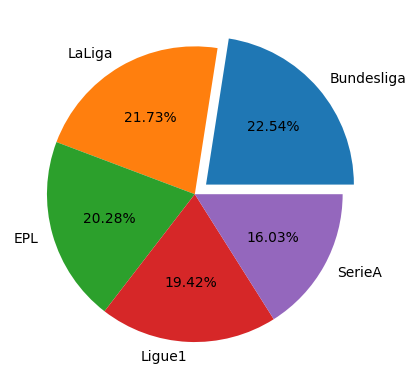

In [419]:
plt.pie(df.league.value_counts(),labels=df.league.value_counts().index, autopct='%.2f%%',explode=[0.1,0,0,0,0])
plt.show()

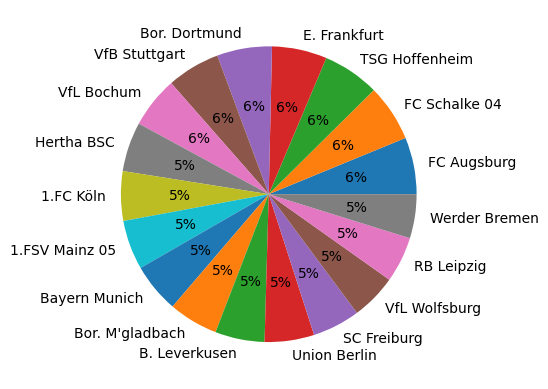

In [420]:
df_bundesliga = df[df['league'] == 'Bundesliga']
plt.pie(df_bundesliga.club.value_counts(),labels=df_bundesliga.club.value_counts().index, autopct='%.0f%%')
plt.show()

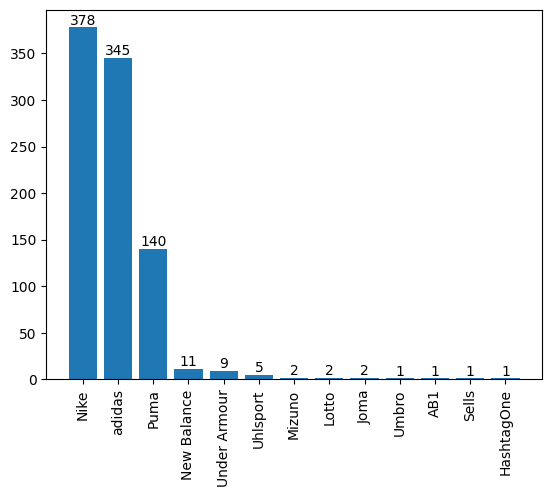

In [421]:
plt.bar(df.outfitter.value_counts().index,df.outfitter.value_counts())
plt.xticks(rotation=90)
for i, value in enumerate(df.outfitter.value_counts()):
    bar = plt.gca().patches[i]
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom', fontsize=10)

plt.show()

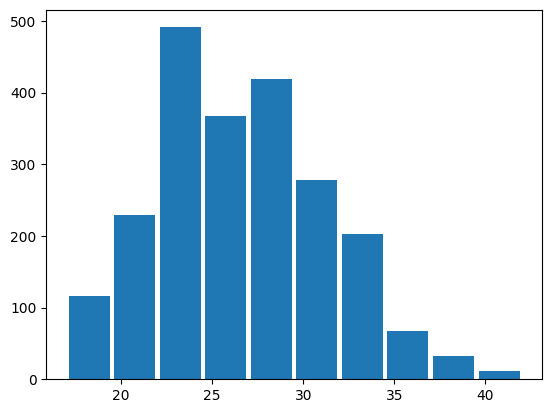

In [422]:
plt.hist(df.age, rwidth=0.9)
plt.show()

In [423]:
numeric_df = df[['age','height','price','max_price']]
numeric_df

,age,height,price,max_price
0,29,1.88,45.00,70.0
1,30,1.85,6.00,6.0
2,37,1.88,0.25,6.0
3,26,1.87,75.00,75.0
4,28,1.80,35.00,40.0
...,...,...,...,...
2521,24,1.87,3.50,9.0
2522,29,1.79,2.80,6.0
2523,22,1.92,1.80,1.8
2524,30,1.83,1.00,6.0


Age mean: 26.399728997289973


Text(0.5, 1.0, 'Age Distribution')

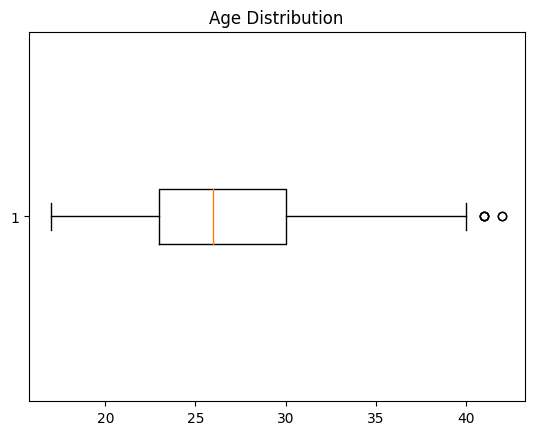

In [424]:
plt.boxplot(numeric_df.age,vert=False)
print('Age mean:',numeric_df.age.mean())
plt.title('Age Distribution')

<Axes: >

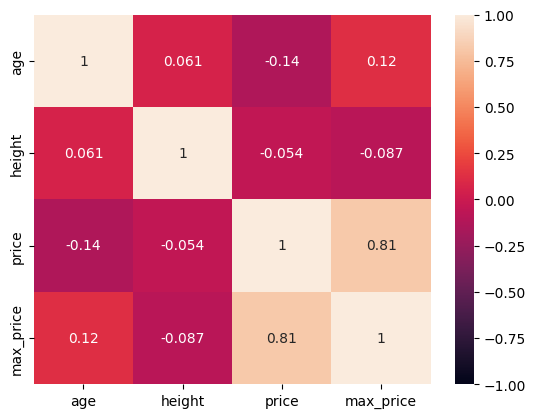

In [425]:
sns.heatmap(numeric_df.corr(),vmax=1,vmin=-1,annot=True)

<Axes: xlabel='price', ylabel='max_price'>

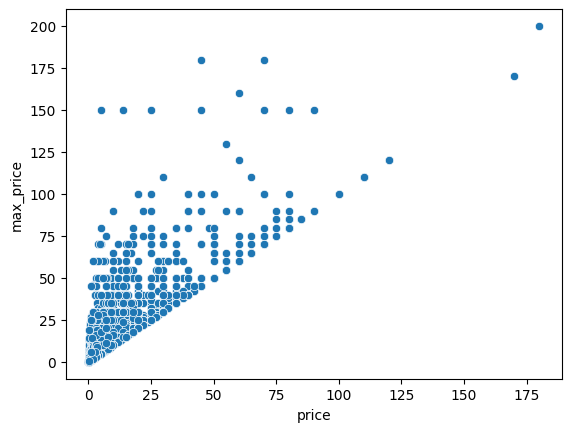

In [426]:
sns.scatterplot(numeric_df,x=numeric_df.price,y=numeric_df.max_price)

In [427]:
pd.pivot_table(df,index='role',values=['price','max_price'])

,max_price,price
role,,
Attack,24.834848,14.449821
Defender,14.488118,8.887233
Midfielder,20.571971,13.217718
